In [14]:
from ucimlrepo import fetch_ucirepo 
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import shutil

In [5]:
import sys
print(sys.executable)

c:\Users\suwat\AppData\Local\Programs\Python\Python312-32\python.exe


In [3]:
# Fetch dataset 
support2 = fetch_ucirepo(id=880) 

# Data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 

# Combine features and targets into a single DataFrame, if desired
df = pd.concat([X, y], axis=1)

# # Save to CSV
# df.to_csv('output.csv', index=False)

# # Move the file to a location where it can be accessed/downloaded
# shutil.move('output.csv', 'csv')

# metadata 
print(support2.metadata) 

# variable information 
print(support2.variables)

df = pd.read_csv('data.csv', header = None)
df.columns = ['id','age','death','sex','hospdead','slos','d.time','dzgroup','dzclass','num.co','edu','income','scoma','charges','totcst','totmcst','avtisst','race','sps','aps','surv2m','surv6m','hday','diabetes','dementia','ca','prg2m','prg6m','dnr','dnrday','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph','glucose','bun','urine','adlp','adls','sfdm2','adlsc']
# นับจำนวนคอลัมน์ทั้งหมด
num_columns = len(df.columns)
# แสดงผลลัพธ์
print(f"จำนวนคอลัมน์ทั้งหมด: {num_columns}")
df.head()


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.19995117,141,7.459961,NaN,NaN,NaN,7,7,NaN,7
2,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.5,132,7.25,NaN,NaN,NaN,NaN,1,<2 mo. follow-up,1
3,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2,134,7.459961,NaN,NaN,NaN,1,0,<2 mo. follow-up,0
4,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.79992676,139,NaN,NaN,NaN,NaN,0,0,no(M2 and SIP pres),0


กำหนด Taget variable

In [4]:
# กำหนด Target variable
target_variable = pd.to_numeric(df['charges'], errors='coerce')

Cleaning Data

In [5]:
# เก็บจำนวนคอลัมน์และแถวก่อนการลบ
cols_before = df.columns
rows_before = df.shape[0]

# ลบคอลัมน์ที่มีค่าหายไปมากกว่า 40%
df = df.loc[:, df.isnull().mean() < 0.4]
cols_after = df.columns

# ลบแถวที่มีค่าหายไปมากกว่า 30%
df = df.dropna(thresh=len(df.columns) * 0.7)
rows_after = df.shape[0]

# คำนวณจำนวนคอลัมน์ที่ถูกลบออก
cols_dropped = set(cols_before) - set(cols_after)

# คำนวณจำนวนแถวที่ถูกลบ
rows_dropped = rows_before - rows_after

# แสดงผลลัพธ์
print("cols_before : ",cols_before)
print("cols_After : ",cols_after)
print("คอลัมน์ที่ถูกลบ:")
print(cols_dropped)

print("\nคอลัมน์ที่ยังคงอยู่:")
print(df.columns)

print(f"\nจำนวนแถวที่ถูกลบ: {rows_dropped}")

# แสดงข้อมูลตัวอย่าง
print("\nข้อมูลตัวอย่างหลังการลบ:")

# # Remove non-numeric columns
# numeric_df = df.select_dtypes(include=[np.number])
df.head()


cols_before :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')
cols_After :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc'],
      dtype='object')
คอลัมน์ที่ถูกลบ:
{'bun', 'a

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,temp,pafi,alb,bili,crea,sod,ph,adls,sfdm2,adlsc
0,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,temp,pafi,alb,bili,crea,sod,ph,adls,sfdm2,adlsc
1,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,36,388,1.7998047,0.19998169,1.19995117,141,7.459961,7,NaN,7
2,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,34.59375,98,NaN,NaN,5.5,132,7.25,1,<2 mo. follow-up,1
3,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,37.39844,231.65625,NaN,2.19970703,2,134,7.459961,0,<2 mo. follow-up,0
4,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,35,NaN,NaN,NaN,0.79992676,139,NaN,0,no(M2 and SIP pres),0


In [61]:
print(df.dtypes)

id          object
age         object
death       object
sex         object
hospdead    object
slos        object
d.time      object
dzgroup     object
dzclass     object
num.co      object
edu         object
income      object
scoma       object
charges     object
totcst      object
totmcst     object
avtisst     object
race        object
sps         object
aps         object
surv2m      object
surv6m      object
hday        object
diabetes    object
dementia    object
ca          object
prg2m       object
prg6m       object
dnr         object
dnrday      object
meanbp      object
wblc        object
hrt         object
resp        object
temp        object
pafi        object
alb         object
bili        object
crea        object
sod         object
ph          object
adls        object
sfdm2       object
adlsc       object
dtype: object


Change to Numeric

In [6]:
categorical_columns = ['sex','income','race','ca', 'dzgroup', 'dzclass', 'dnr' , 'sfdm2'] 
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if not already
    label_encoders[col] = le
print(f"Categorical columns: {categorical_columns}")
df[categorical_columns].head()
# df.head()

Categorical columns: ['sex', 'income', 'race', 'ca', 'dzgroup', 'dzclass', 'dnr', 'sfdm2']


,sex,income,race,ca,dzgroup,dzclass,dnr,sfdm2
0,2,3,5,0,8,4,0,6
1,1,0,4,1,6,2,4,4
2,0,0,6,2,3,1,3,0
3,0,5,6,2,3,1,4,0
4,0,5,6,1,6,2,4,5


In [ ]:
# แปลงคอลัมน์ที่ควรเป็นตัวเลขทั้งหมด
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # แปลงเป็นตัวเลข ถ้าไม่สามารถแปลงได้จะกลายเป็น NaN


Missing Value

In [5]:
# ฟังก์ชันสำหรับ hot-deck imputation (ใช้ KNN)
def hot_deck_imputation(X_train, X_test):
    imputer = KNNImputer(n_neighbors=5)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    return X_train_imputed, X_test_imputed

In [6]:
def evaluate_imputation(method, df, target_col='charges'):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    
    X_train = df_train.drop(columns=[target_col])
    y_train = df_train[target_col]
    
    X_test = df_test.drop(columns=[target_col])
    y_test = df_test[target_col]
    
    # Handle missing values in the target variable
    y_train = pd.to_numeric(y_train, errors='coerce')  # แปลงให้เป็นตัวเลข
    y_test = pd.to_numeric(y_test, errors='coerce')

    y_train = y_train.fillna(y_train.mean())
    y_test = y_test.fillna(y_test.mean())
    
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    elif method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
        
    elif method == 'hot_deck':
        # Hot-deck Imputation (Using KNN)
        X_train_imputed, X_test_imputed = hot_deck_imputation(X_train, X_test)
    
    # elif method == 'regression':
    #     # Normal Regression (predict target directly)
    #     # แปลง X_train และ X_test ให้เป็น 2D array ถ้าจำเป็น
    #     if len(X_train.shape) == 1:
    #         X_train = X_train.reshape(-1, 1)
    #     if len(X_test.shape) == 1:
    #         X_test = X_test.reshape(-1, 1)
        
    #     model = LinearRegression()
    #     model.fit(X_train, y_train)
    #     y_pred = model.predict(X_test)
    #     mse = mean_squared_error(y_test, y_pred)
    #     return mse
    
    elif method == 'nearest_neighbor':
        # Nearest Neighbor (KNNImputer)
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    else:
        raise ValueError(f"Unknown method: {method}")

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    # Predict and calculate MSE
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

In [8]:
# รายการวิธีการที่จะทดสอบ
methods = ['mean', 'mode', 'hot_deck', 'nearest_neighbor']
results = {}

df = pd.read_csv('./csv/filled_data.csv')

# สร้างสำเนาข้อมูลเพื่อเติมค่า
df_filled = df.copy()

# วนลูปทีละคอลัมน์ใน df ยกเว้นคอลัมน์เป้าหมาย 'charges'
for col in df.columns:
    if col == 'charges':  # ข้ามคอลัมน์เป้าหมาย
        continue  
    print(f"\nTesting column: {col}")
    results[col] = {}

    # วนลูปทดสอบแต่ละวิธีการเติมค่าที่หายไป
    for method in methods:
        try:
            print(f"  Method: {method}")
            mse = evaluate_imputation(method, df, target_col=col)
            results[col][method] = mse
            print(f"    MSE: {mse}")
        except ValueError as e:
            print(f"    Error with method {method}: {e}")

    # หาวิธีที่ดีที่สุดที่มีค่า MSE ต่ำที่สุด
    best_method = min(results[col], key=results[col].get)
    print(f"Best method for {col}: {best_method}")

    # เติมค่า Missing Value ใน df_filled สำหรับคอลัมน์นั้นด้วยวิธีที่ดีที่สุด
    if best_method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif best_method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
    elif best_method == 'hot_deck':
        imputer = KNNImputer(n_neighbors=5)
    elif best_method == 'nearest_neighbor':
        imputer = KNNImputer(n_neighbors=5)

    # เติมค่าในคอลัมน์นั้นๆ
    df_filled[col] = df_filled[col].mask(df_filled[col].isna(), imputer.fit_transform(df[[col]]).flatten())

# บันทึกผลลัพธ์ลงในไฟล์ CSV
output_file = 'filled_data.csv'
df_filled.to_csv(output_file, index=False)
shutil.move('filled_data.csv', 'csv')
print(f"\nCompleted filling missing values. Results saved to {output_file}")


Testing column: id
  Method: mean


NameError: name 'train_test_split' is not defined

Plot Real Data Feature 

In [ ]:
# Load the data from the uploaded file
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data
data.head()

# Plotting histograms for each column to see data distribution
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Feature Normalization

In [ ]:
# Load the data from the uploaded file
file_path = './csv/filled_data_with_charges.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data
data.head()

# Columns to apply transformations 
columns_to_transform = ['id', 'age', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc', 'charges']

# Function to compute skewness and plot data
def plot_and_evaluate(column_data, title):
    # Calculate skewness
    skewness = column_data.skew()
    
    # Plot the data
    plt.figure(figsize=(4, 2))
    sns.histplot(column_data, kde=True)
    plt.title(f'{title} (Skewness: {skewness:.2f})')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()
    
    return skewness


# Function to normalize the data (min-max scaling)
def normalize(column_data):
    return (column_data - column_data.min()) / (column_data.max() - column_data.min())

# Loop through each column and apply transformations
for column in columns_to_transform:
    if column in data.columns:
        print(f"\n--- Column: {column} ---")
        
        # Filter out non-positive values
        data_filtered = data[data[column] > 0][column]

        if len(data_filtered) > 0:

            # 1. Log Transformation (base 10)
            log_transformed_data = np.log(data_filtered)
            log_skewness = log_transformed_data.skew()
            
            # 2. Square Root Transformation
            sqrt_transformed_data = np.sqrt(data_filtered)
            sqrt_skewness = sqrt_transformed_data.skew()
            
            # 3. Box-Cox Transformation
            boxcox_transformed_data, _ = stats.boxcox(data_filtered)
            boxcox_skewness = pd.Series(boxcox_transformed_data).skew()
            
            # Choose the best transformation based on skewness (closer to 0 means better)
            skewness_values = {
                'Log10': log_skewness,
                'Square Root': sqrt_skewness,
                'Box-Cox': boxcox_skewness
            }
            best_transformation = min(skewness_values, key=lambda k: abs(skewness_values[k]))
            
            print(f"\nBest transformation for {column}: {best_transformation} (Skewness: {skewness_values[best_transformation]:.2f})")

            # Plot the best transformation data
            if best_transformation == 'Log':
                best_transformed_data = log_transformed_data
            elif best_transformation == 'Square Root':
                best_transformed_data = sqrt_transformed_data
            elif best_transformation == 'Box-Cox':
                best_transformed_data = pd.Series(boxcox_transformed_data)

            # Plot the best transformation
            plot_and_evaluate(best_transformed_data, f'Transformed of {column}')
            
            # Normalize the best transformation data
            normalized_data = normalize(best_transformed_data)

            # Plot the normalized data
            plt.figure(figsize=(6, 4))
            sns.histplot(normalized_data, kde=True)
            plt.title(f'Normalized Transformed of {column}')
            plt.xlabel(f'{column}')
            plt.ylabel('Frequency')
            plt.show()

        else:
            print(f"Skipping column '{column}' because it has no positive values.")
    else:
        print(f"Column '{column}' not found in the dataset.")


Handle missing

In [17]:
# Load the data from the uploaded file
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

# ดูข้อมูลที่มีค่า missing value ในคอลัมน์ charges
print(f"Missing values in 'charges': {data['charges'].isnull().sum()}")

# เลือกฟีเจอร์ที่สำคัญในการใช้ทำนาย (จะเลือกจากคอลัมน์ที่ไม่มี missing value)
# คุณสามารถเลือกคอลัมน์เพิ่มเติมหรือลบคอลัมน์ที่ไม่เกี่ยวข้องออก
# features = ['age', 'slos', 'd.time', 'dzgroup', 'dzclass','totcst','num.co', 'edu', 'income'] 0.6717
features = ['slos','dzclass','totcst','totmcst','num.co', 'income','scoma','avtisst','hday'] #0.6970


# แยกข้อมูลออกเป็นสองส่วน: ข้อมูลที่ไม่มีค่า missing value และข้อมูลที่มีค่า missing value
data_without_missing = data[data['charges'].notna()]
data_with_missing = data[data['charges'].isna()]

# แยก Features และ Target จากข้อมูลที่ไม่มีค่า missing
X = data_without_missing[features]
y = data_without_missing['charges']

# แยกชุดทดสอบ (เพื่อประเมินโมเดล) หรือจะใช้ทั้งชุดข้อมูลทั้งหมดก็ได้
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
reg_model = LinearRegression()

# ฝึกโมเดลด้วยข้อมูลที่ไม่มี missing values
reg_model.fit(X_train, y_train)

# ประเมินโมเดล (คุณสามารถพิมพ์ค่า score เพื่อดูความแม่นยำได้)
score = reg_model.score(X_test, y_test)
print(f"Model R^2 score: {score:.4f}")

# ใช้โมเดลในการทำนายค่าที่ missing ในคอลัมน์ charges
X_missing = data_with_missing[features]
predicted_values = reg_model.predict(X_missing)

# เติมค่าที่ทำนายลงไปใน DataFrame เดิม
data.loc[data['charges'].isna(), 'charges'] = predicted_values

# ตรวจสอบผลลัพธ์: ไม่มีค่า missing ใน charges อีกต่อไป
print(f"Missing values in 'charges' after filling: {data['charges'].isnull().sum()}")

# Optional: บันทึกข้อมูลที่เติมค่า missing ลงไปใหม่
data.to_csv('filled_data_with_charges.csv', index=False)

Missing values in 'charges': 171
Model R^2 score: 0.6970
Missing values in 'charges' after filling: 0


Target : Charges

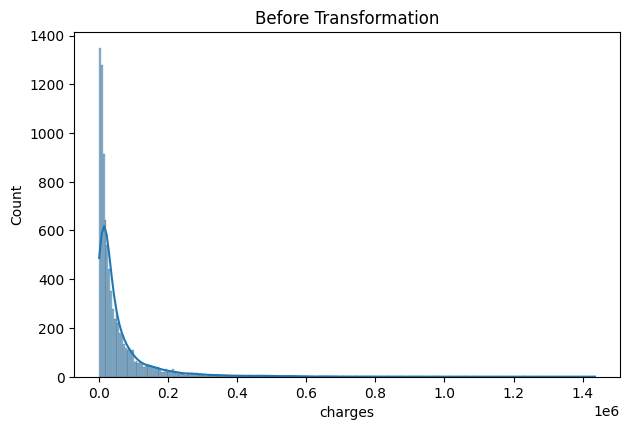

In [24]:
# ดูการกระจายตัวของข้อมูลก่อนการแปลง
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(target_variable, kde=True)
plt.title('Before Transformation')

plt.tight_layout()
plt.show()

Normalize to 0-1

In [ ]:
# Normalize the log-transformed values
scaler = MinMaxScaler()
log_transformed_normalized = scaler.fit_transform(log_transformed.values.reshape(-1, 1))

# Add normalized log-transformed charges to the dataframe
df['log_transformed_normalized'] = log_transformed_normalized

# Plot
plt.figure(figsize=(14, 7))


Log Transformation method

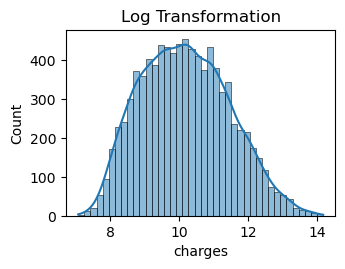

In [15]:

log_transformed = np.log1p(target_variable)  # ใช้ np.log1p เพื่อหลีกเลี่ยง log(0) ที่ไม่กำหนดค่า
plt.subplot(2, 2, 2)
sns.histplot(log_transformed, kde=True)
plt.title('Log Transformation')

plt.tight_layout()
plt.show()

plt.subplot(2, 2, 3)
sns.histplot(log_transformed_normalized, kde=True)
plt.title('Normalized Log-transformed Charges')

Square root transformation

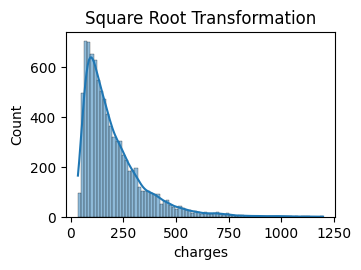

In [17]:
sqrt_transformed = np.sqrt(target_variable)
plt.subplot(2, 2, 3)
sns.histplot(sqrt_transformed, kde=True)
plt.title('Square Root Transformation')

plt.tight_layout()
plt.show()

Box-Cox Transformation

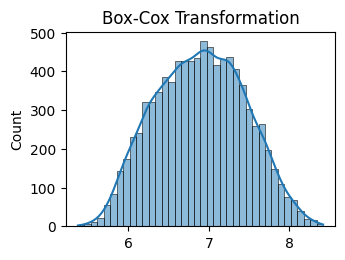

In [18]:
target_variable = target_variable.dropna()
target_variable = target_variable[target_variable > 0]

target_variable_positive = target_variable + 0.001
boxcox_transformed, _ = boxcox(target_variable_positive)
plt.subplot(2, 2, 4)
sns.histplot(boxcox_transformed, kde=True)
plt.title('Box-Cox Transformation')

plt.tight_layout()
plt.show()

Normalization Min-Max

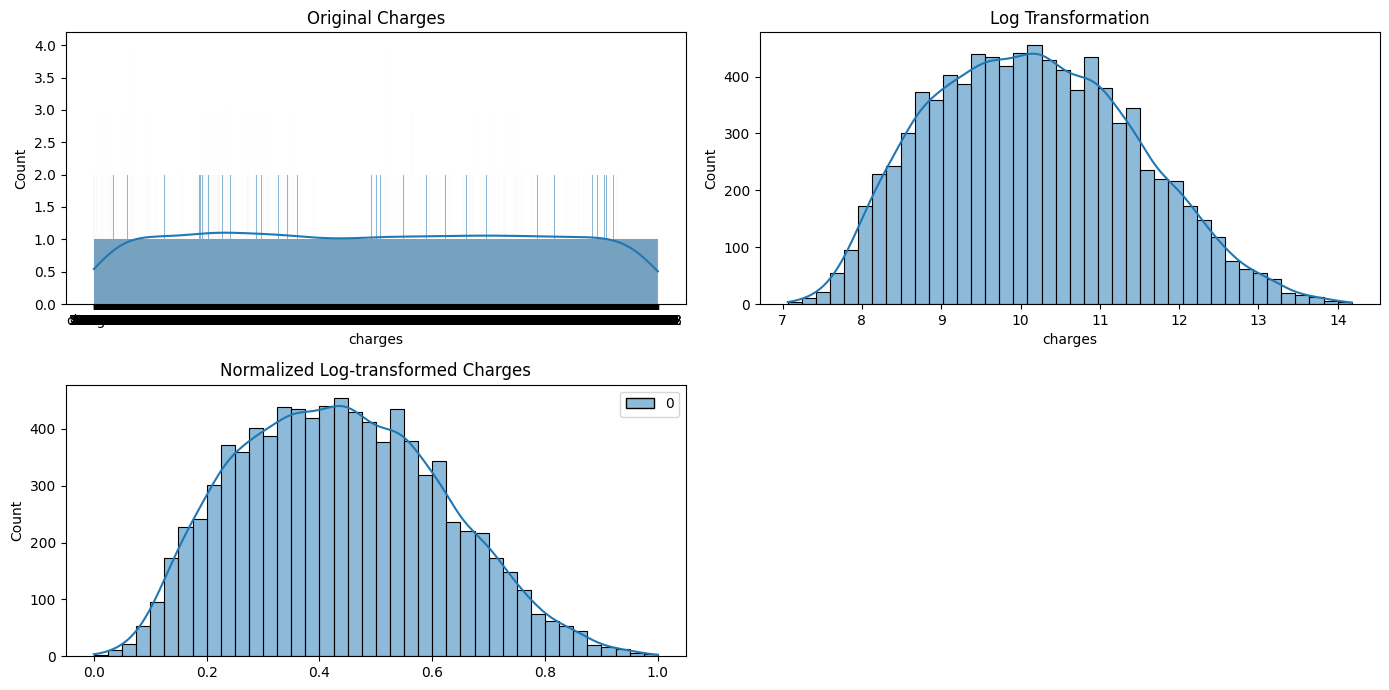

In [19]:
# Normalize the log-transformed values
scaler = MinMaxScaler()
log_transformed_normalized = scaler.fit_transform(log_transformed.values.reshape(-1, 1))

# Add normalized log-transformed charges to the dataframe
df['log_transformed_normalized'] = log_transformed_normalized

# Plot
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Original Charges')

plt.subplot(2, 2, 2)
sns.histplot(log_transformed, kde=True)
plt.title('Log Transformation')

plt.subplot(2, 2, 3)
sns.histplot(log_transformed_normalized, kde=True)
plt.title('Normalized Log-transformed Charges')

plt.tight_layout()
plt.show()

Feature Selection
1. Filter Method (Correlation Matrix)

In [20]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Compute correlation with the target variable
target_correlation = correlation_matrix['charges'].abs().sort_values(ascending=False)

# Select features with high correlation with the target variable
high_correlation_features = target_correlation[target_correlation > 0.1].index
print(high_correlation_features)

KeyError: 'charges'